In [25]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Dataset

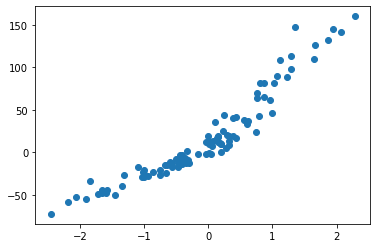

In [26]:
x,y =make_regression(n_samples = 100, n_features=1, noise=10)
y = y + abs(y/2)
plt.scatter(x,y)

In [27]:
print(x.shape)
y=y.reshape(y.shape[0],1   )
print(y.shape)

(100, 1)
(100, 1)


In [28]:
## Matrice X
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
X.shape

(100, 3)

In [29]:
theta= np.random.randn(3,1)
theta

array([[-0.35915851],
       [ 3.5737936 ],
       [ 1.71696251]])

# Modele

$$
y=ax^2+bx+c
$$

In [30]:
def model(X, theta):
    return np.dot(X,theta) # prediction= model(X, theta_final) #X.dot(theta)
    

In [31]:
m=model(X, theta)


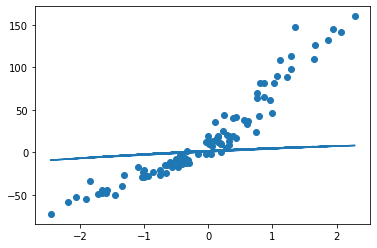

In [32]:
plt.scatter(x,y)
plt.plot(x,model(X,theta))

# Fonction cout

In [33]:
def cost_function(x, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum(( model(X,theta) - y )**2)

In [34]:
cost_function(x,y, theta)


1235.5234766561189

# Gradients et Descente de Gradient

In [35]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X, theta)-y)

In [36]:
def grad_descent(X,y, theta, learning_rate, n_iterations):
    cost_history= np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta, cost_history

# Machine learning

In [37]:

theta_final, cost_history=grad_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)
theta_final, 
cost_history

array([1210.85391138, 1186.82688472, 1163.4190934 , 1140.60836884,
       1118.37361276, 1096.69473662, 1075.55260472, 1054.9289807 ,
       1034.80647722, 1015.16850873,  995.99924695,  977.2835791 ,
        959.00706858,  941.15591796,  923.71693424,  906.67749609,
        890.02552307,  873.74944668,  857.83818308,  842.2811074 ,
        827.06802965,  812.18917192,  797.63514699,  783.39693818,
        769.46588031,  755.83364186,  742.49220808,  729.4338651 ,
        716.65118497,  704.13701154,  691.88444714,  679.88684005,
        668.13777261,  656.63105011,  645.36069021,  634.32091297,
        623.50613151,  612.91094309,  602.53012074,  592.35860534,
        582.39149815,  572.62405371,  563.05167315,  553.66989788,
        544.47440358,  535.46099454,  526.62559828,  517.96426048,
        509.47314016,  501.14850509,  492.9867275 ,  484.98427995,
        477.13773143,  469.44374367,  461.89906763,  454.50054016,
        447.24508081,  440.12968887,  433.15144044,  426.30748

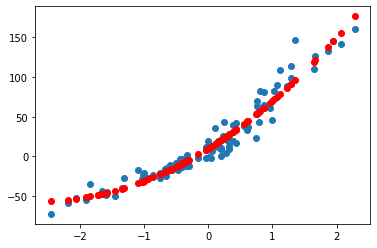

In [42]:
prediction= model(X, theta_final)
plt.scatter(x,y)
plt.scatter(x,prediction, c='r')

# Courbe d'apprentissage

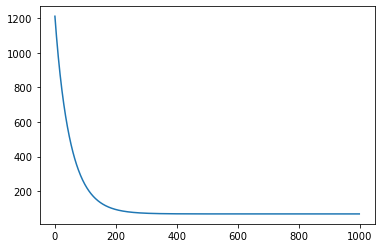

In [39]:
plt.plot(range(1000),cost_history)

In [40]:
# Méthode des moindres carrés 
def coef_determination(y, pred):
    u= ((y-pred)**2).sum()
    v= ((y-y.mean())**2).sum()
    return 1-u/v
    

In [41]:
coef_determination(y,prediction)

0.9468889085297653